# Outlier (Điểm ngoại lai)

Có hai cách chính mà các ngoại lệ có thể ảnh hưởng đến dự báo của Prophet. Ở đây, chúng tôi đưa ra dự báo về các lượt truy cập Wikipedia đã ghi vào trang R từ trước đó, nhưng với một khối dữ liệu xấu:

In [2]:
import pandas as pd
from prophet import Prophet

15:44:46 - cmdstanpy - INFO - Chain [1] start processing
15:44:47 - cmdstanpy - INFO - Chain [1] done processing


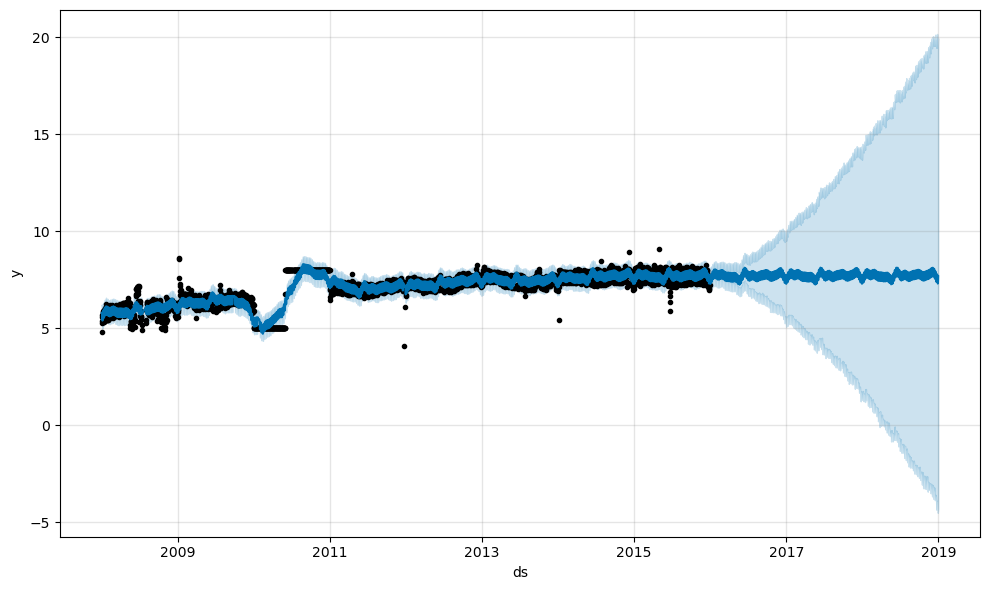

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

Dự báo xu hướng có vẻ hợp lý, nhưng khoảng không chắc chắn dường như quá rộng. Prophet có thể xử lý các ngoại lệ trong lịch sử, nhưng chỉ bằng cách điều chỉnh chúng phù hợp với các thay đổi xu hướng. Mô hình không chắc chắn sau đó mong đợi những thay đổi xu hướng trong tương lai với mức độ tương tự.

Cách tốt nhất để xử lý các ngoại lệ là loại bỏ chúng - Prophet không gặp vấn đề gì với việc thiếu dữ liệu. Nếu bạn đặt giá trị của chúng thành NA trong lịch sử nhưng để lại ngày trong tương lai, thì Prophet sẽ cung cấp cho bạn dự đoán về giá trị của chúng.

15:46:59 - cmdstanpy - INFO - Chain [1] start processing
15:47:01 - cmdstanpy - INFO - Chain [1] done processing


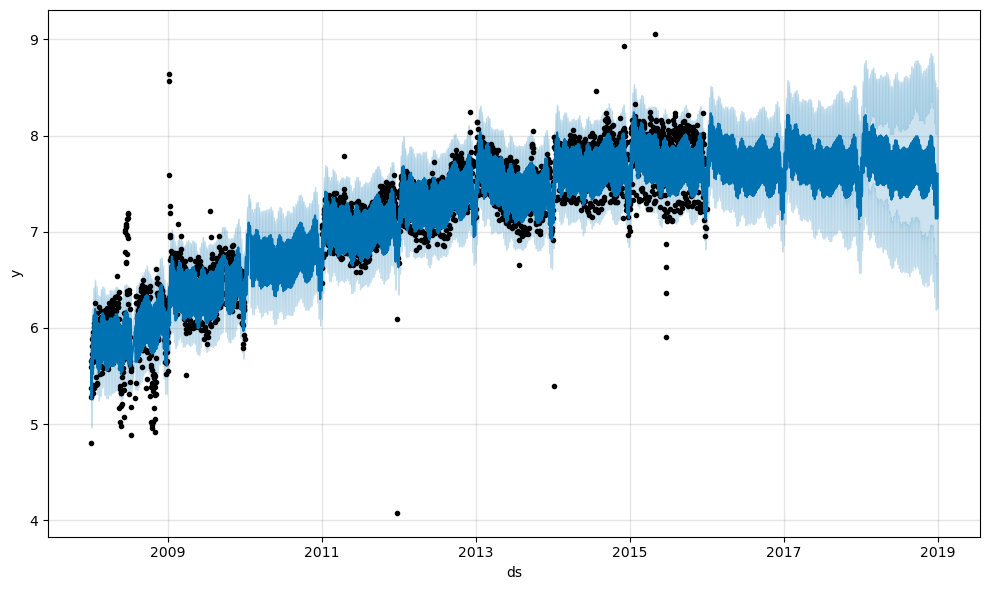

In [4]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))

Trong ví dụ trên, các giá trị ngoại lai đã làm sai lệch ước tính độ không đảm bảo nhưng không ảnh hưởng đến dự báo chính yhat. Điều này không phải lúc nào cũng đúng, như trong ví dụ này với các ngoại lệ được thêm vào:

15:49:16 - cmdstanpy - INFO - Chain [1] start processing
15:49:16 - cmdstanpy - INFO - Chain [1] done processing


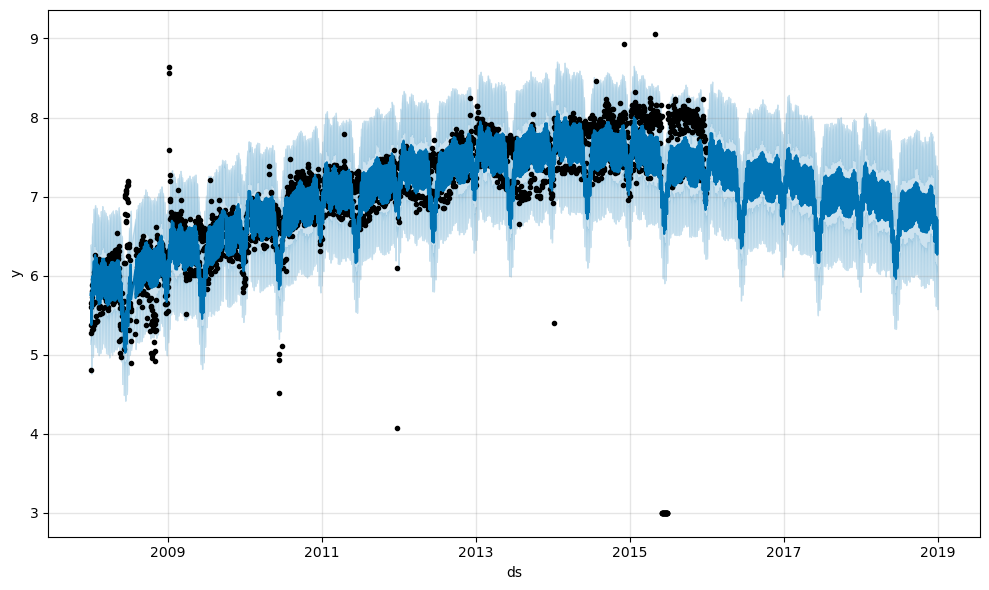

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

Ở đây, một nhóm các trường hợp ngoại lệ cực đoan vào tháng 6 năm 2015 đã làm sai lệch ước tính theo mùa, do đó tác động của chúng sẽ vang vọng mãi mãi trong tương lai. Một lần nữa, cách tiếp cận đúng là loại bỏ chúng:

15:50:04 - cmdstanpy - INFO - Chain [1] start processing
15:50:05 - cmdstanpy - INFO - Chain [1] done processing


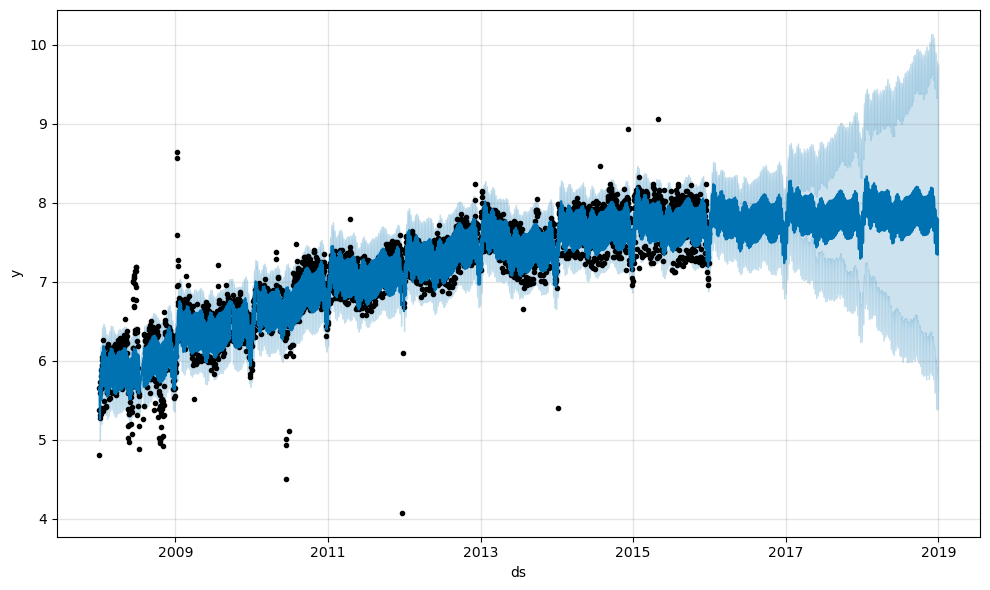

In [6]:
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))